In [1]:
from dmc2gymnasium import DMCGym
from synther.diffusion.utils import make_inputs
import numpy as np
from dm_control import suite
from tqdm import trange

env = suite.load(domain_name="cartpole", task_name="swingup")

/scratch/work/liub6/miniconda3/lib/python3.8/site-packages/glfw/__init__.py:914: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
/scratch/work/liub6/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import numpy as np
from collections import Counter

# 生成原始连续浮点数据
original_data = np.random.uniform(0, 10, size=100)  # 示例数据，范围在 0 到 10 之间

# 将数据分桶
num_bins = 10
bins = np.linspace(0, 10, num_bins + 1)
digitized = np.digitize(original_data, bins) - 1  # 将数据分配到桶中

# 计算每个桶的频率分布
data_counter = Counter(digitized)

# 确定目标频率
total_count = len(original_data)
unique_values = len(data_counter)
target_frequency = total_count // unique_values

# 根据目标频率复制数据
new_data = []
for bin_index, count in data_counter.items():
    bin_data = original_data[digitized == bin_index]
    if count < target_frequency:
        new_data.extend(np.random.choice(bin_data, target_frequency, replace=True))
    else:
        new_data.extend(bin_data)

# 将 new_data 转换为 NumPy 数组
new_data = np.array(new_data)

# 打印结果
print("Original Data Distribution:", data_counter)
print("New Data Distribution:", Counter(np.digitize(new_data, bins) - 1))

Original Data Distribution: Counter({6: 16, 7: 13, 5: 12, 1: 10, 4: 10, 3: 9, 9: 9, 2: 9, 8: 7, 0: 5})
New Data Distribution: Counter({6: 16, 7: 13, 5: 12, 8: 10, 3: 10, 1: 10, 4: 10, 0: 10, 9: 10, 2: 10})


In [7]:
digitized

array([7, 8, 3, 6, 1, 8, 4, 1, 3, 1, 0, 7, 4, 8, 9, 2, 1, 1, 7, 3, 0, 8,
       3, 5, 9, 8, 0, 2, 6, 5, 6, 1, 7, 6, 9, 7, 7, 9, 6, 5, 3, 5, 9, 2,
       4, 0, 7, 7, 2, 7, 6, 7, 5, 6, 1, 2, 6, 4, 4, 2, 8, 1, 8, 5, 1, 2,
       4, 2, 4, 4, 6, 2, 3, 5, 5, 9, 5, 5, 4, 4, 3, 7, 6, 1, 6, 6, 6, 5,
       3, 7, 5, 6, 9, 7, 9, 6, 6, 0, 3, 9])

In [8]:
data_counter

Counter({7: 13, 8: 7, 3: 9, 6: 16, 1: 10, 4: 10, 0: 5, 9: 9, 2: 9, 5: 12})

In [9]:
new_data

array([7.95318714, 7.90931741, 7.46500841, 7.72471516, 7.9106561 ,
       7.46126232, 7.27901843, 7.59799517, 7.76069452, 7.21331434,
       7.99147266, 7.28794556, 7.82003303, 8.3985118 , 8.42105164,
       8.77922887, 8.08533334, 8.68376333, 8.68060242, 8.10111292,
       8.68376333, 8.08533334, 8.08533334, 3.92035458, 3.69095507,
       3.17976217, 3.31810818, 3.47509134, 3.31810818, 3.17976217,
       3.31810818, 3.17976217, 3.17535227, 6.53260379, 6.10377439,
       6.80916108, 6.82882919, 6.56395859, 6.53305085, 6.63037751,
       6.33801472, 6.64182845, 6.80292075, 6.51829168, 6.21694708,
       6.63731205, 6.66025267, 6.89996168, 6.85613266, 1.63020131,
       1.70715512, 1.56929972, 1.0247453 , 1.47826415, 1.31457251,
       1.09757452, 1.95655486, 1.93830539, 1.97292515, 4.63745688,
       4.44837995, 4.46408398, 4.36804583, 4.28186514, 4.08513691,
       4.42346808, 4.93153509, 4.01352101, 4.61659045, 0.2406168 ,
       0.66151903, 0.29929591, 0.3462653 , 0.29929591, 0.34626

In [2]:
import collections
FLAT_OBSERVATION_KEY = 'observations'
def flatten_observation(observation, output_key=FLAT_OBSERVATION_KEY):
  """Flattens multiple observation arrays into a single numpy array.

  Args:
    observation: A mutable mapping from observation names to numpy arrays.
    output_key: The key for the flattened observation array in the output.

  Returns:
    A mutable mapping of the same type as `observation`. This will contain a
    single key-value pair consisting of `output_key` and the flattened
    and concatenated observation array.

  Raises:
    ValueError: If `observation` is not a `collections.abc.MutableMapping`.
  """
  if not isinstance(observation, collections.abc.MutableMapping):
    raise ValueError('Can only flatten dict-like observations.')

  if isinstance(observation, collections.OrderedDict):
    keys = observation.keys()
  else:
    # Keep a consistent ordering for other mappings.
    keys = sorted(observation.keys())

  observation_arrays = [observation[key].ravel() for key in keys]
  return type(observation)([(output_key, np.concatenate(observation_arrays))])

In [3]:
def _flatten_obs(obs, dtype=np.float32):
    obs_pieces = []
    for v in obs.values():
        flat = np.array([v]) if np.isscalar(v) else v.ravel()
        obs_pieces.append(flat)
    return np.concatenate(obs_pieces, axis=0).astype(dtype)

In [4]:
def reset_to_state(env, state):
    env._reset_next_step = False
    env._step_count = 0
    with env._physics.reset_context():
        env._physics.named.data.qpos[:] = np.array([state[0], state[1]])
        env._physics.named.data.qvel[:] = np.array([state[2], state[3]])
    env._task.after_step(env._physics)

In [29]:
training_dataset = make_inputs("dm-cartpole-train-length-front-v0", original=True, context=False, top=False)

In [6]:
for key in training_dataset.keys():
    print(key, training_dataset[key].max(), training_dataset[key].min())

observations 31.949108 -33.64754
actions 1.0 -1.0
rewards 0.99999994 9.160572e-15
next_observations 31.949108 -33.64754
terminals 0.0 0.0
contexts 0.45 0.15


In [7]:
diffusion_dataset = np.load("./results-front/5m_samples.npz_0.6.npz")
diffusion_dataset = {key: diffusion_dataset[key] for key in diffusion_dataset.files}

In [8]:
for key in diffusion_dataset.keys():
    print(key, diffusion_dataset[key].max(), diffusion_dataset[key].min())

observations 31.949116 -33.64754
actions 1.00001 -1.0
rewards 1.0000099 9.160572e-15
next_observations 31.949116 -33.64754
terminals 1.0 0.0


In [11]:
range = 10000

reward_loss = np.zeros((range, 1))
observation_loss = np.zeros((range, diffusion_dataset["observations"].shape[1]))

# for transition in trange(diffusion_dataset["observations"].shape[0]):
for transition in trange(range):
    index = np.ones(diffusion_dataset["observations"].shape[1], dtype=bool)
    index[2] = False
    observation = diffusion_dataset["observations"][transition]
    state = observation[index]
    # state[1] = np.arccos(state[1].clip(-1, 1))
    state[1] = np.arctan2(observation[2], observation[1])
    action = diffusion_dataset["actions"][transition]
    reward = diffusion_dataset["rewards"][transition]
    next_observation = diffusion_dataset["next_observations"][transition]
    
    # if transition == 0:
    #     print(observation, action, reward, next_observation)
    reset_to_state(env, state)
    timestamp = env.step(action)
    reward_true = timestamp.reward
    next_observation_true = _flatten_obs(timestamp.observation)
    reward_loss[transition, :] = np.abs(reward - reward_true)
    observation_loss[transition, :] = np.abs(next_observation - next_observation_true)


  1%|          | 83/10000 [00:00<00:11, 828.38it/s]

100%|██████████| 10000/10000 [00:02<00:00, 3412.61it/s]


In [19]:
print("reward loss mean", reward_loss.mean())
print("reward loss std", reward_loss.std())
print("reward loss max", reward_loss.max())
print("reward loss min", reward_loss.min())

reward loss mean 0.005887576468562004
reward loss std 0.010094534580582343
reward loss max 0.24448302921185172
reward loss min 2.8861569911775575e-08


In [21]:
print("observation loss mean", observation_loss.mean(axis=0))
print("observation loss std", observation_loss.std(axis=0))
print("observation loss max", observation_loss.max(axis=0))
print("observation loss min", observation_loss.min(axis=0))

observation loss mean [0.01149967 0.00378807 0.00569061 0.04761611 0.17897437]
observation loss std [0.00926209 0.00485621 0.00503067 0.04961528 0.14351316]
observation loss max [0.07756805 0.07936823 0.06487185 1.20159531 1.31640124]
observation loss min [2.61515379e-06 1.19209290e-07 5.66244125e-07 2.90572643e-07
 2.69636512e-05]


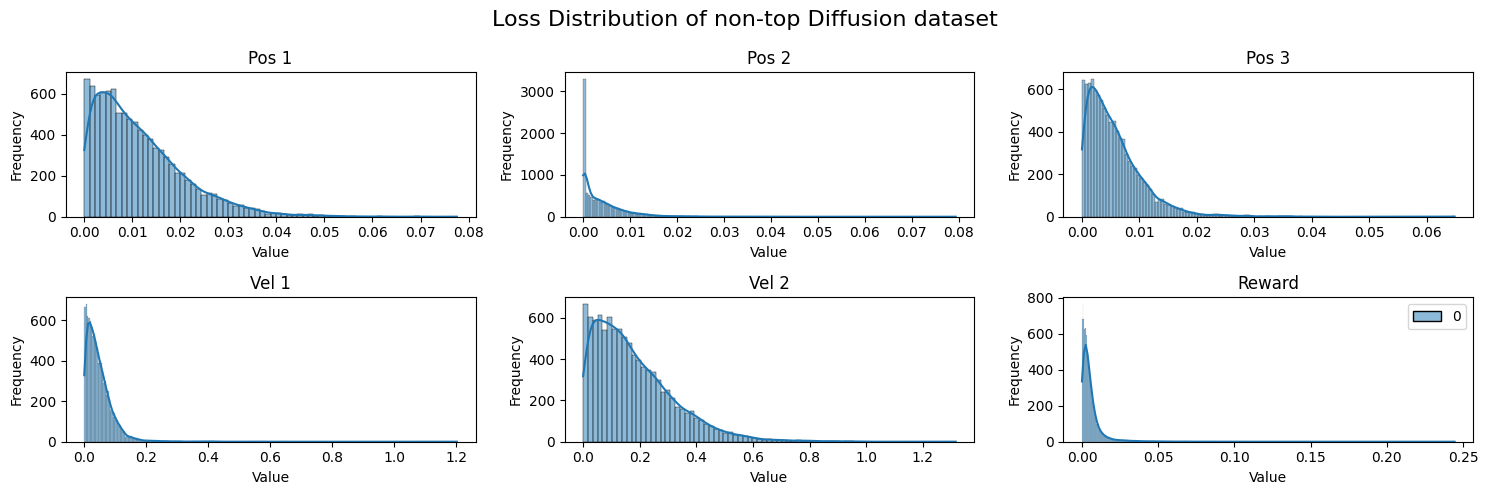

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(15, 5))

fig.suptitle('Distribution of non-top Diffusion dataset Loss', fontsize=16)

sns.histplot(observation_loss[:range, 0], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Pos 1')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(observation_loss[:range, 1], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Pos 2')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(observation_loss[:range, 2], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Pos 3')
axes[0, 2].set_xlabel('Value')
axes[0, 2].set_ylabel('Frequency')

sns.histplot(observation_loss[:range, 3], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Vel 1')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(observation_loss[:range, 4], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Vel 2')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(reward_loss[:range], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Reward')
axes[1, 2].set_xlabel('Value')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

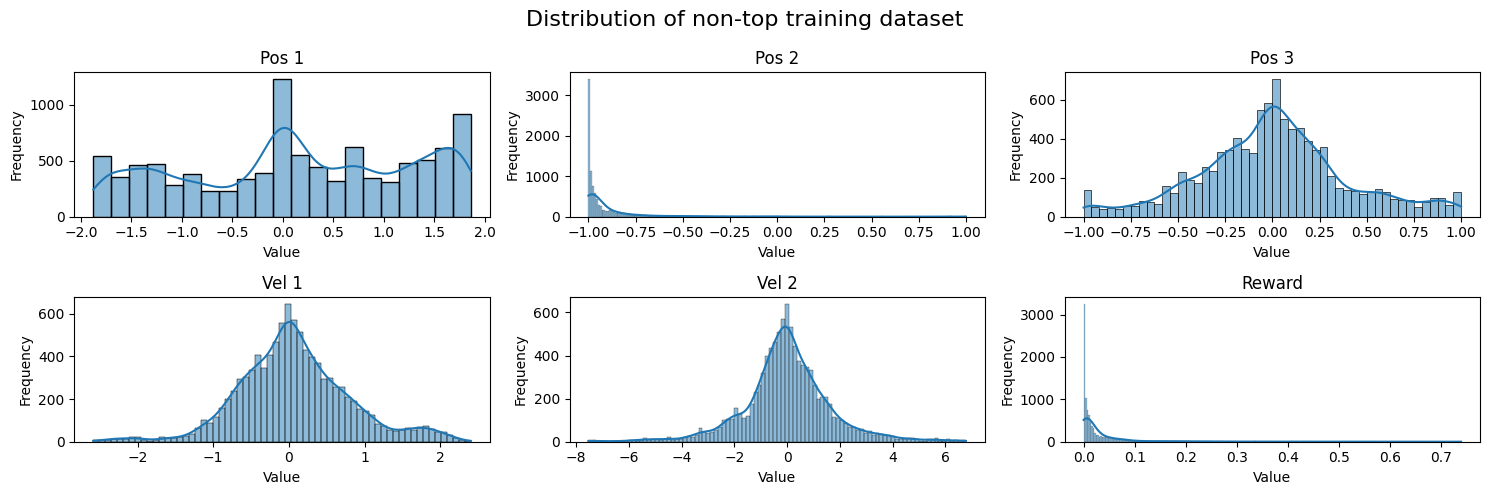

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(15, 5))

fig.suptitle('Distribution of non-top training dataset', fontsize=16)

sns.histplot(training_dataset["observations"][:range, 0], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Pos 1')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(training_dataset["observations"][:range, 1], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Pos 2')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(training_dataset["observations"][:range, 2], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Pos 3')
axes[0, 2].set_xlabel('Value')
axes[0, 2].set_ylabel('Frequency')

sns.histplot(training_dataset["observations"][:range, 3], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Vel 1')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(training_dataset["observations"][:range, 4], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Vel 2')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(training_dataset["rewards"][:range], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Reward')
axes[1, 2].set_xlabel('Value')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

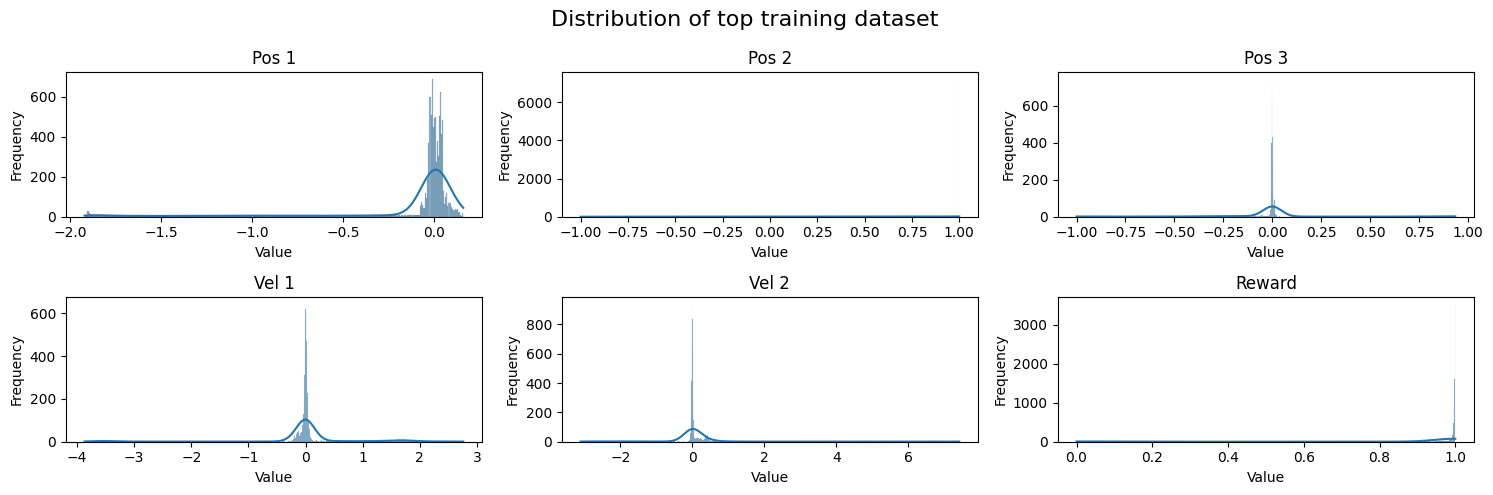

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(15, 5))

fig.suptitle('Distribution of top training dataset', fontsize=16)

sns.histplot(training_dataset["observations"][:range, 0], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Pos 1')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(training_dataset["observations"][:range, 1], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Pos 2')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(training_dataset["observations"][:range, 2], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Pos 3')
axes[0, 2].set_xlabel('Value')
axes[0, 2].set_ylabel('Frequency')

sns.histplot(training_dataset["observations"][:range, 3], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Vel 1')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(training_dataset["observations"][:range, 4], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Vel 2')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(training_dataset["rewards"][:range], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Reward')
axes[1, 2].set_xlabel('Value')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

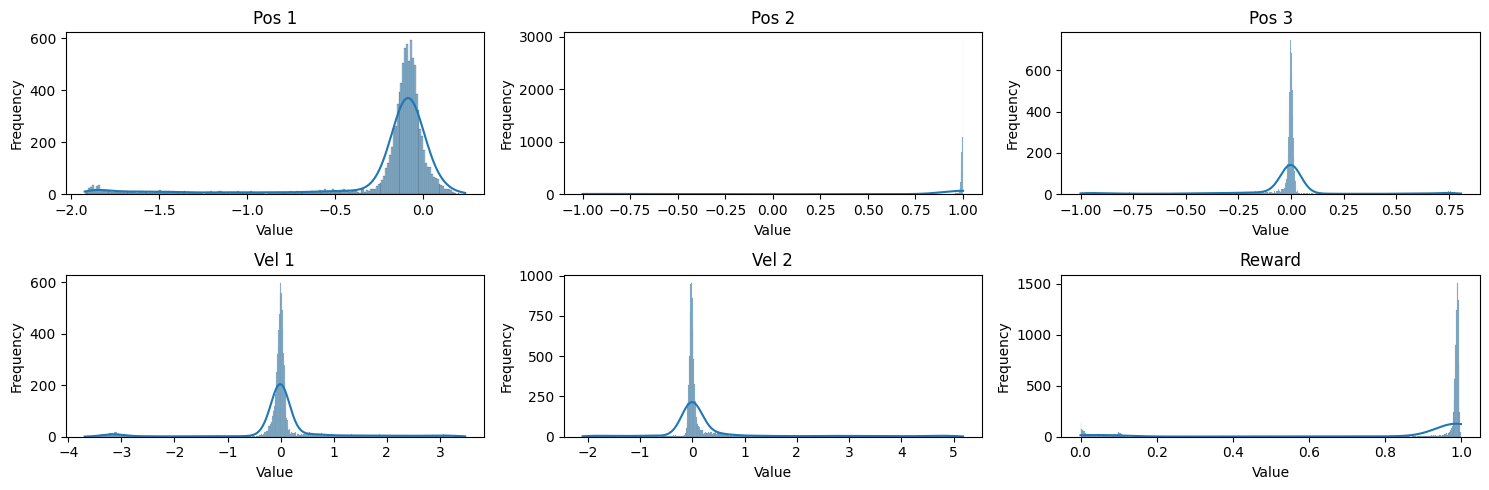

In [46]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# fig, axes = plt.subplots(2, 3, figsize=(15, 5))

# sns.histplot(diffusion_dataset["observations"][:range, 0], kde=True, ax=axes[0, 0])
# axes[0, 0].set_title('Pos 1')
# axes[0, 0].set_xlabel('Value')
# axes[0, 0].set_ylabel('Frequency')

# sns.histplot(diffusion_dataset["observations"][:range, 1], kde=True, ax=axes[0, 1])
# axes[0, 1].set_title('Pos 2')
# axes[0, 1].set_xlabel('Value')
# axes[0, 1].set_ylabel('Frequency')

# sns.histplot(diffusion_dataset["observations"][:range, 2], kde=True, ax=axes[0, 2])
# axes[0, 2].set_title('Pos 3')
# axes[0, 2].set_xlabel('Value')
# axes[0, 2].set_ylabel('Frequency')

# sns.histplot(diffusion_dataset["observations"][:range, 3], kde=True, ax=axes[1, 0])
# axes[1, 0].set_title('Vel 1')
# axes[1, 0].set_xlabel('Value')
# axes[1, 0].set_ylabel('Frequency')

# sns.histplot(diffusion_dataset["observations"][:range, 4], kde=True, ax=axes[1, 1])
# axes[1, 1].set_title('Vel 2')
# axes[1, 1].set_xlabel('Value')
# axes[1, 1].set_ylabel('Frequency')

# sns.histplot(diffusion_dataset["rewards"][:range], kde=True, ax=axes[1, 2])
# axes[1, 2].set_title('Reward')
# axes[1, 2].set_xlabel('Value')
# axes[1, 2].set_ylabel('Frequency')

# plt.tight_layout()

# plt.show()